# 03. PyTorch Computer Vision

Course video - [Source](https://www.youtube.com/watch?v=Z_ikDlimN6A)

GitHub Repo - [Source](https://github.com/Yer-Marti/PyTorch-Course)

PyTorch Doc - [Source](https://pytorch.org/docs/stable/index.html)

## Contents

* [Contents](#scrollTo=r9UUF2Xmou7h&line=1&uniqifier=1)
* [Theory](#scrollTo=6BbI9txwo35i&line=1&uniqifier=1)
* [Computer vision libraries in PyTorch](#scrollTo=CLYY9bYge3bN)
* [Getting a dataset](#scrollTo=_Uxmm1-skiVY)
* [Prepare DataLoader](#scrollTo=PMPinQ-0GzhW&line=1&uniqifier=1)
* [Model 0: Build a baseline model](#scrollTo=9l8Jm-0eMYJz)
* [Make predictions and get Model 0 results](#scrollTo=fmZuKEvM8Wbk)
* [Set up device-agnostic code](#scrollTo=xjyILrcm_oyR)
* [Model 1: Building a better model with non-linearity](#scrollTo=7yFwYyvDA6lf)
* [Model 2: Building a Convolutional Neural Network](#scrollTo=x0rMvAhx3-3J)
* [Compare model results and training time](#scrollTo=pvahSnwFjCiO&line=1&uniqifier=1)
* [Make and evaluate random predictions with the best model](#scrollTo=DEZasvxJk70I&line=1&uniqifier=1)
* [Making a confusion matrix](#scrollTo=bn78e9byrv_2&line=3&uniqifier=1)
* [Save and load the best performing model](#scrollTo=Vtpbf-lB1O_3&line=1&uniqifier=1)
* [Exercises](#scrollTo=I-asRQIJ3qQt&line=1&uniqifier=1)

## Theory

Computer vision is the field that gives answer to the problem of detecting patterns on **image data**. The images are converted into tensors of either shape `[batch_size, height, width, color_channels]` or `[batch_size, height, width, color_channels]`. The first one is refered as *NHWC* and the latter as *NCHW*, where N stands for **number of batches**.

Problems regarding computer vision are solved using a **Convolutional Neural Network (ConvNet/CNN)**. It consists of a number of transformations to the data prior to the usual neural network layers which permit dimensional reductions and other operations called **convolutions** to filter the data before feeding it to the neural network layers.

> More detailed explanation about **CNN** can be found in [here](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53).

Table with important definitions:

| Hyperparameter / Layer type | What does it do? | Typical values |
|:---:|:---:|:---:|
| Input image(s) | Target images you'd like to discover patterns in | Whatever you can take a photo or video of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, height, width, color_channels]` (channels last) or `input_shape = [batch_size, height, width, color_channels]` (channels first) |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with `torch.nn.ConvXd()` (X can be multiple values) |
| Hidden activation/non-linear activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU (`torch.nn.ReLU()`), though can be many more |
| Pooling layer | Reduces the dimensionality of learned image features | Max (`torch.nn.MaxPool2d()`) or Average (`torch.nn.AvgPool2d()`) |
| Output layer/linear layer | Takes learned features and outputs them in shape of target labels | `torch.nn.Linear(out_features=[number_of_classes])` |
| Output activation | Converts output logits to prediction probabilities | `torch.sigmoid()` for binary classification or `torch.softmax()` for multi-class classification |

## 0. Computer vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pre-trained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with a ML model
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.DataLoader` - creates a Python iterable over a dataset

In [1]:
# Iport PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


## 1. Getting a dataset

The dataset we'll be using is [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist) from `torchvision.datasets`.

In [2]:
# Set up training data
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root="data", # Where to download data to
    train=True, # Selecting training set, testing set if false
    download=True, # do we want to download y/n
    transform=torchvision.transforms.ToTensor(), # How we want to transform the data
    target_transform=None # how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data", # Where to download data to
    train=False, # Selecting training set, testing set if false
    download=True, # do we want to download y/n
    transform=torchvision.transforms.ToTensor(), # How we want to transform the data
    target_transform=None # how do we want to transform the labels/targets
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

### Checking input and output shapes

In [4]:
# See first training sample
image, label = train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [5]:
class_names = train_data.classes

class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx

class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### Visualizing our data

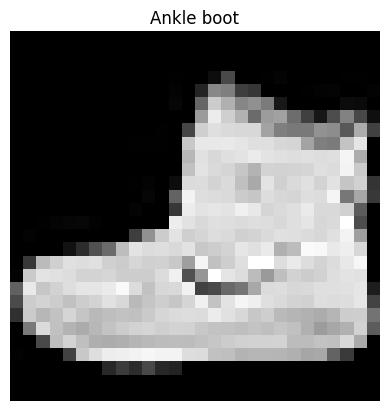

In [8]:
image, label = train_data[0]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

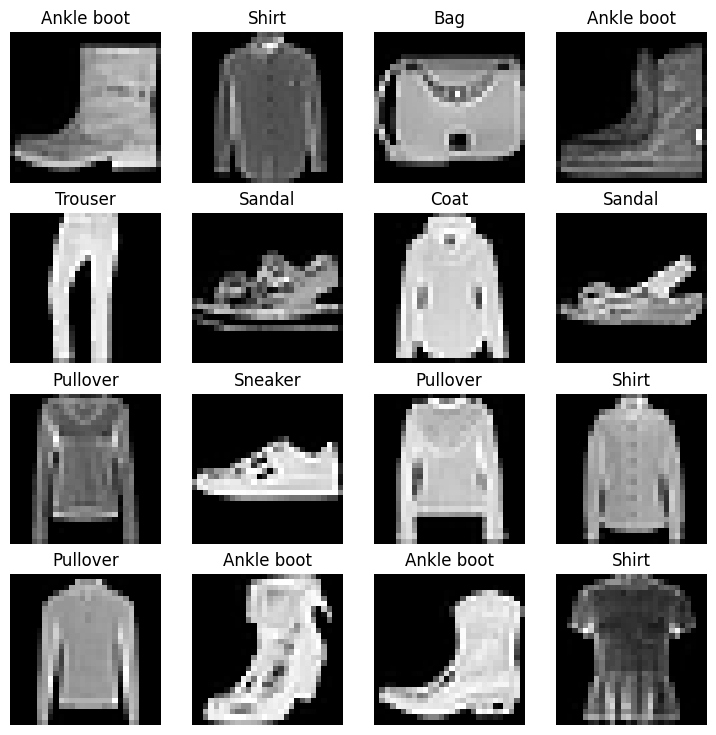

In [9]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

In [10]:
from torch.utils.data import DataLoader

# Set up the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e2cc976b9a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e2cc976b760>)

In [11]:
# Checking what we created...
print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7e2cc976b9a0>, <torch.utils.data.dataloader.DataLoader object at 0x7e2cc976b760>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [12]:
# Check what is inside the dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Just like we wanted, each batch has 32 features/images and 32 labels.

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


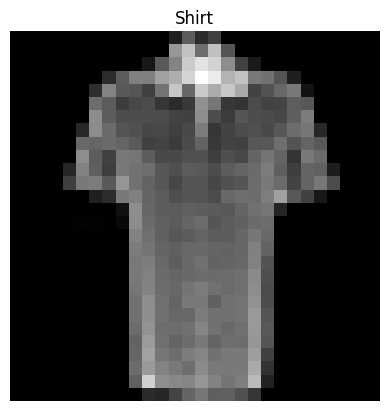

In [13]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of Machine Learning mmodelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [14]:
# Creating a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
print(f"Initial sample shape: {x.shape}")

# Flatten the sample
output = flatten_model(x) # perform forward pass
print(f"Flattened sample shape: {output.shape}")

Initial sample shape: torch.Size([1, 28, 28])
Flattened sample shape: torch.Size([1, 784])


In [15]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [16]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784, # This is 28x28 from before
    hidden_units=10,
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

Creating a dummy forward pass to check the model:

In [17]:
dummy_x = torch.rand([1, 1, 28, 28])
dummy_y = model_0(dummy_x)
print(f"y: {dummy_y}\n\ny shape: {dummy_y.shape}")

y: tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

y shape: torch.Size([1, 10])


We get what we were looking for: for each batch, 10 probability values (one for each class).

### Model 0: Setting up a loss function, optimizer and evaluation metrics

* Loss function - since we are working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our usual optimizer `torch.optim.SGD()`
* Evaluation metric - since we are working on a classificcation problem, let's use accuracy as our evaluation metric

In [18]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists


In [19]:
# Import accuracy metric
from helper_functions import accuracy_fn as acc_fn

# Set up loss function
loss_fn = nn.CrossEntropyLoss()

# Set up optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### Creating a function to time our experiments

Machine Learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performace (loss and accuracy values etc)
2. How fast it runs

In [20]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and time"""
  total_time = end - start
  print(f"\nTrain time on {device}: {total_time:.3f} seconds")
  return total_time

In [21]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start_time, end_time, "cpu")


Train time on cpu: 0.000 seconds


4.731499996069033e-05

### Creating a training loop and training a model on batches of data

1. Loop though epochs.
2. Loop though training batches, perform training steps, calculate the train loss *per batch*.
3. Loop though testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all.

In [22]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep it small for faster training time)
epochs = 3

# Create a training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ### Training
  train_loss = 0
  # Add a loop to loop though the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulatively) and accuracy
      test_loss += loss_fn(test_pred, y_test)
      test_acc += acc_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  # Print out
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

# Calculate training time
train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.04%
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.20%
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.43%

Train time on cpu: 44.836 seconds


> **Note:** notice that the `optimizer` will update the model's parameters once per batch rather than once per epoch.

## 4. Make predictions and get Model 0 results

In [23]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device="cpu"):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Make our data device-agnostic
      X, y = X.to(device), y.to(device)

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

In [24]:
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=acc_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 5. Set up a device-agnostic code for using a GPU

In [25]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

We learned about the power of non-linearity in the previous lesson, so let's use it for this new model.

In [26]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)

In [27]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

### Model 1: Setting up a loss function, optimizer and evaluation metrics

In [28]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### Functionizing training and evaluation/testing loops

Let's create a function for:
* Training loop - `train_step()`
* Testing loop - `test_step()`

In [29]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with a model trying to learn on data_loader."""

  train_loss, train_acc = 0, 0

  model = model.to(device)
  model.train()

  # Add a loop to loop though the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate train loss
    train_acc += accuracy_fn(y, y_pred.argmax(dim=1))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Divide total train loss and accuracy by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [30]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """Performs a testing with a model being evaluated on a data_loader."""

  test_loss, test_acc = 0, 0

  model = model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Put data on target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate loss and accuracy (per batch)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y, test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

  print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

> **Note:** if we want to modify something that is within the context manager (`torch.inference_mode()`), we gotta make sure we still are inside the context manager, else Python will throw an error.

In [31]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer

train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create an optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"\nEpoch: {epoch}\n--------")

  train_step(
      model=model_1,
      data_loader=train_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      device=device
  )

  test_step(
      model=model_1,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device
  )

train_time_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0
--------
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
--------
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
--------
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%

Train time on cuda: 34.656 seconds


In [32]:
print(f"Train time for model_0 (CPU): {total_train_time_model_0:.5f} seconds")
print(f"\nTrain time for model_1 (GPU): {total_train_time_model_1:.5f} seconds")

Train time for model_0 (CPU): 44.83647 seconds

Train time for model_1 (GPU): 34.65620 seconds


> **Note:** Sometimes, depending on your data/hardware, we might find that your model trains faster on CPU than GPU.
>
> Why is this?
>
> 1. It could be that the overhead for copying data/model to and from the GPU outweights the compute benefits offered by the GPU.
> 2. The hardware we are using has a better CPU in terms of compute capability than the GPU.

In [33]:
# Get model_1_results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [34]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## Model 2: Building a Convolutional Neural Network (CNN)

CNNs are also known as ConvNet. CNNs are known for their capabilities to find patterns in visual data.

We are going to replicate the architecture in [CNN Explainer](https://poloclub.github.io/cnn-explainer/).

In [35]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """Model architecture that replicates the TinyVGG model from CNN explainer website."""
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # There is a trick to calculate this (see note below)
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

> **Note:** if we print the output shapes inside the `forward()` method we can test how the convolution blocks transform the data.
>
> ```
> Output shape of conv_block_1: torch.Size([1, 10, 14, 14])
> Output shape of conv_block_2: torch.Size([1, 10, 7, 7])
> ---------------------------------------------------------------------------
> RuntimeError                              Traceback (most recent call last)
> <ipython-input-78-d6e19c572e97> in <cell line: 1>()
> ----> 1 dummy_pass = model_2(rand_image_tensor.unsqueeze(0).to(device))
>
> 8 frames
> /usr/local/lib/python3.10/dist-packages/torch/nn/modules/linear.py in forward(self, input)
>    112
>    113     def forward(self, input: Tensor) -> Tensor:
>--> 114         return F.linear(input, self.weight, self.bias)
>    115
>    116     def extra_repr(self) -> str:
>
> RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x490 and 10x10)
> ```
>
> As we can see, the output shape for `conv_block_2` is `[1, 10, 7, 7]`, and the error tells us that he is expecting a `10x10` matrix and is receiving a `1x490`. The latter one is the result from the `nn.Flatten()` function. In other words, the result from the flattening is a tensor with `lenght=490` because the input tensor is `10x7x7`, which equals `490`. Because the `hidden_units` is 10 in this case, then we need to multiply the input by `7x7`.

In [36]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(
    input_shape=1, # Number of color_channels
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### Stepping though `nn.Conv2d()`

We are going to step though this new layer with some dummy data in order to learn how it works.

In [37]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])


In [38]:
# Create a single Conv2d() layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

# Pass the data though the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### Stepping though `nn.MaxPool2d()`

Same as before, we are going to step though this new layer with the dummy data in order to learn how it works.

In [39]:
print(f"Original shape: {test_image.shape}")

# Create a single MaxPool2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data though just the conv_layer
test_image_though_conv = conv_layer(test_image)
print(f"Shape after going though conv_layer: {test_image_though_conv.shape}")

# Pass data though the max pool layer
test_image_though_conv_and_max_pool = max_pool_layer(test_image_though_conv)
print(f"Shape after going though conv_layer and max_pool_layer: {test_image_though_conv_and_max_pool.shape}")

Original shape: torch.Size([3, 64, 64])
Shape after going though conv_layer: torch.Size([10, 64, 64])
Shape after going though conv_layer and max_pool_layer: torch.Size([10, 32, 32])


In [40]:
torch.manual_seed(42)

# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor though the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)

print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### Making a dummy forward pass on our model

In [41]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [42]:
dummy_pass = model_2(rand_image_tensor.unsqueeze(0).to(device))

dummy_pass.shape

torch.Size([1, 10])

> **Note:** we use the `unsqueeze()` to add a new dimension to feed the model (the model expects the `branch_size` dimension too).

### Set up loss function/optimizer/eval metrics

In [43]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

### Training and testing `model_2` using our training and testing functions

In [44]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test the model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"\nEpoch: {epoch}\n-----------")

  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

train_time_end_model_2 = timer()

total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                 end=train_time_end_model_2,
                                 device=device)

  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0
-----------
Train loss: 0.59400 | Train acc: 78.38%
Test loss: 0.39200 | Test acc: 85.94%

Epoch: 1
-----------
Train loss: 0.36470 | Train acc: 86.89%
Test loss: 0.35771 | Test acc: 86.86%

Epoch: 2
-----------
Train loss: 0.32490 | Train acc: 88.28%
Test loss: 0.32201 | Test acc: 88.41%

Train time on cuda: 43.344 seconds


In [45]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32200536131858826,
 'model_acc': 88.40854632587859}

## 8. Compare model results and training time

In [46]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.322005,88.408546


In [47]:
# Add training time to results comparison

compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,44.836469
1,FashionMNISTModelV1,0.685001,75.019968,34.656204
2,FashionMNISTModelV2,0.322005,88.408546,43.343863


Text(0, 0.5, 'model')

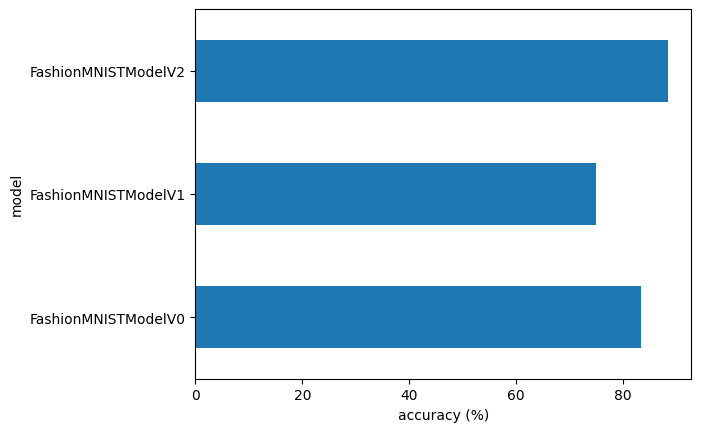

In [48]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with the best model

In [49]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass it to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [50]:
import random
random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

In [51]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[9.7146e-07, 4.7491e-08, 2.6109e-07, 7.4148e-06, 2.7776e-07, 9.9968e-01,
         3.1580e-06, 7.8048e-05, 9.2860e-05, 1.3721e-04],
        [6.4796e-02, 6.5567e-01, 8.1619e-04, 1.2425e-01, 5.7594e-02, 2.6295e-04,
         9.3457e-02, 1.4552e-03, 9.4504e-04, 7.5999e-04]])

In [52]:
# Convert pred probs to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

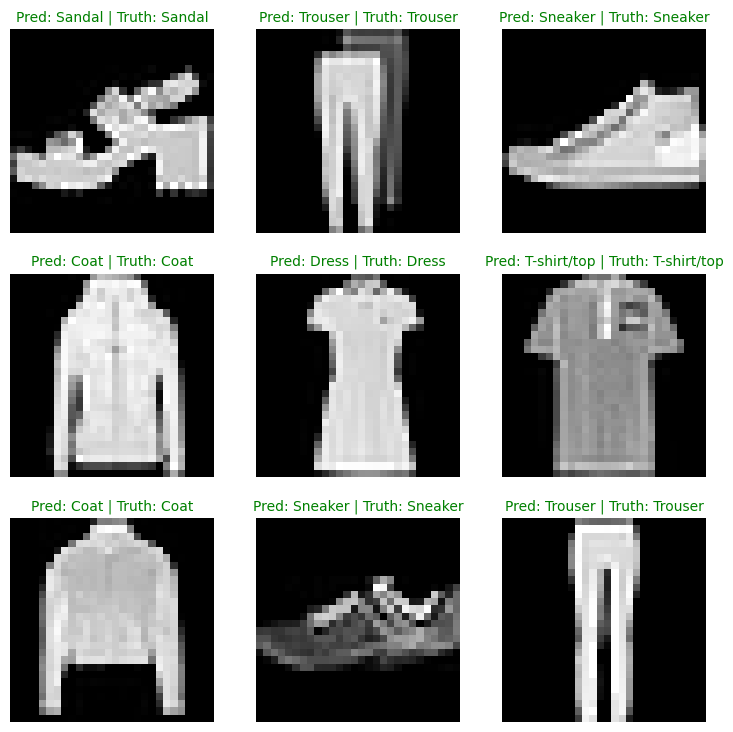

In [53]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  #Create sample
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text)
  truth_label = class_names[test_labels[i]]

  # Create title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a great way to evaluate our models visually.

1. Make predictions with our trained model on the test dataset.
2. Make a [ConfusionMatrix](https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html).
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`.

In [54]:
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send data to device
    X, y = X.to(device), y.to(device)

    # Do the forward pass
    y_logit = model_2(X)

    # Turn logits into labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    # Put prediction on CPU
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [55]:
len(y_pred_tensor)

10000

In [56]:
# See if required packages are installed and if not, install them
try:
  import torchmetrics, mlxtend
  print(f"mletend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split("."))[1] >= 19, "mlxtend version should be 0.10.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mletend version: 0.23.1
mlxtend version: 0.23.1


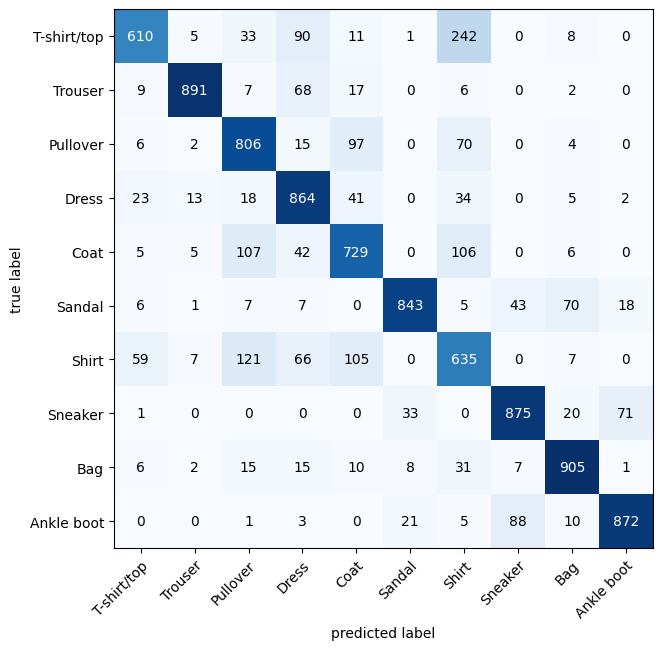

In [57]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Set up confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets) # targets = labels

# 3. Plot our confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib works with numpy
    class_names=class_names,
    figsize=(10, 7)
)

## 11. Save and load the best performing model

In [58]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save model's state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to models/03_pytorch_computer_vision_model_2.pth


In [59]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                hidden_units=10,
                                output_shape=len(class_names))

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [60]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results, loaded_model_2_results

({'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.32200536131858826,
  'model_acc': 88.40854632587859},
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.32200536131858826,
  'model_acc': 88.40854632587859})

In [61]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02) # tolerance

tensor(True)

## Exercises

[Source](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb)

In [62]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

5. Load the `torchvision.datasets.MNIST()` train and test datasets.

In [63]:
import torchvision
from torchvision import datasets

train_data = torchvision.datasets.MNIST(root="data",
                                           train=True,
                                           download=True,
                                           transform=torchvision.transforms.ToTensor(),
                                           target_transform=None)

test_data = torchvision.datasets.MNIST(root="data",
                                           train=False,
                                           download=True,
                                           transform=torchvision.transforms.ToTensor(),
                                           target_transform=None)

len(train_data), len(test_data)

(60000, 10000)

6. Visualize at least 5 different samples of the MNIST training dataset.

In [64]:
image, label = train_data[0]

image.shape, label

(torch.Size([1, 28, 28]), 5)

In [65]:
class_names = train_data.classes

class_names, len(class_names)

(['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'],
 10)

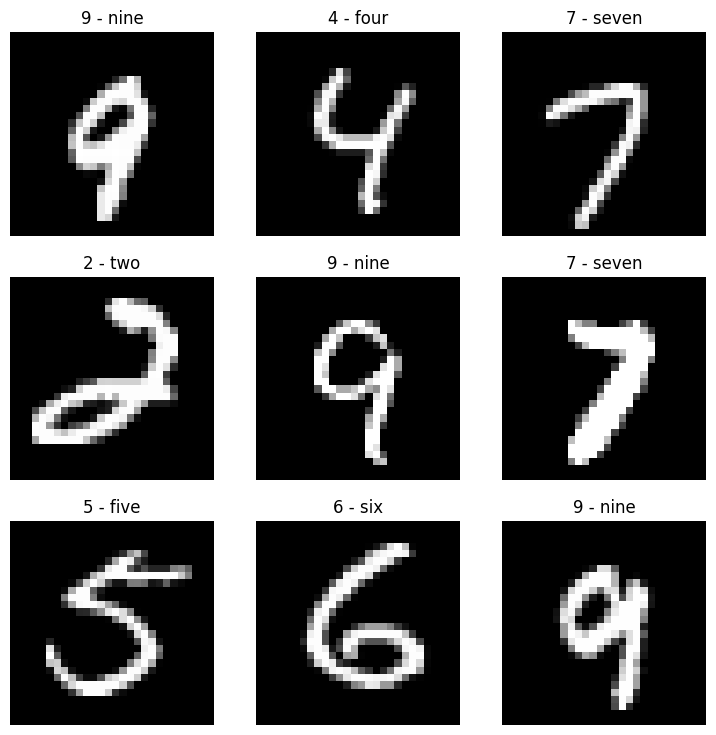

In [66]:
import random
import matplotlib.pyplot as plt

random.seed(42)
rows = 3
cols = 3

plt.figure(figsize=(rows*3, cols*3))
for i in range(rows*cols):
  image, label = train_data[random.randint(0, len(train_data))]
  plt.subplot(3, 3, i+1)
  plt.title(class_names[label])
  plt.axis(False)
  plt.imshow(image.squeeze(), cmap="gray")

7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [67]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

print(f"train_dataloader: {len(train_dataloader)} batches of {train_dataloader.batch_size}")
print(f"test_dataloader: {len(test_dataloader)} batches of {test_dataloader.batch_size}")

train_dataloader: 1875 batches of 32
test_dataloader: 313 batches of 32


8. Recreate `model_2` used in this notebook (the same model from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [68]:
from torch import nn

class MNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_layers: int,
               output_shape: int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_layers,
                  kernel_size=(3, 3),
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_layers,
                  out_channels=hidden_layers,
                  kernel_size=(3, 3),
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2, 2))
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_layers,
                  out_channels=hidden_layers,
                  kernel_size=(3, 3),
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_layers,
                  out_channels=hidden_layers,
                  kernel_size=(3, 3),
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2, 2))
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_layers*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [69]:
model_0_ex = MNISTModelV0(
    input_shape=1,
    hidden_layers=10,
    output_shape=len(class_names)
)

model_0_ex

MNISTModelV0(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

9. Train the model you built in exercise 8 on CPU and GPU and see how long it takes on each.

In [70]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists


In [71]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0_ex.parameters(), lr=0.1)

In [72]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

### Training on CPU
train_time_start_model_0_ex_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs), desc="Training model..."):

  print(f"\nEpoch: {epoch}\n---------")

  train_step(
      model=model_0_ex,
      data_loader=train_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      device="cpu"
  )

  test_step(
      model=model_0_ex,
      data_loader=train_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device="cpu"
  )

train_time_end_model_0_ex_cpu = timer()

total_train_time_model_0_ex_cpu = print_train_time(start=train_time_start_model_0_ex_cpu,
                 end=train_time_end_model_0_ex_cpu,
                 device="cpu")

Training model...:   0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0
---------
Train loss: 0.49549 | Train acc: 82.95%
Test loss: 0.07692 | Test acc: 97.67%

Epoch: 1
---------
Train loss: 0.07361 | Train acc: 97.74%
Test loss: 0.05912 | Test acc: 98.19%

Epoch: 2
---------
Train loss: 0.05717 | Train acc: 98.19%
Test loss: 0.04207 | Test acc: 98.67%

Train time on cpu: 184.884 seconds


In [73]:
model_0_ex = MNISTModelV0(
    input_shape=1,
    hidden_layers=10,
    output_shape=len(class_names)
).to(device)

optimizer = torch.optim.SGD(params=model_0_ex.parameters(), lr=0.1)

model_0_ex

MNISTModelV0(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [74]:
### Training on GPU
train_time_start_model_0_ex_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs), desc="Training model..."):

  print(f"\nEpoch: {epoch}\n---------")

  train_step(
      model=model_0_ex,
      data_loader=train_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      device=device
  )

  test_step(
      model=model_0_ex,
      data_loader=train_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device
  )

train_time_end_model_0_ex_gpu = timer()

total_train_time_model_0_ex_gpu = print_train_time(start=train_time_start_model_0_ex_gpu,
                 end=train_time_end_model_0_ex_gpu,
                 device=device)

Training model...:   0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0
---------
Train loss: 0.34257 | Train acc: 88.38%
Test loss: 0.08938 | Test acc: 97.23%

Epoch: 1
---------
Train loss: 0.07346 | Train acc: 97.72%
Test loss: 0.05599 | Test acc: 98.19%

Epoch: 2
---------
Train loss: 0.05704 | Train acc: 98.20%
Test loss: 0.04135 | Test acc: 98.72%

Train time on cuda: 61.315 seconds


10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

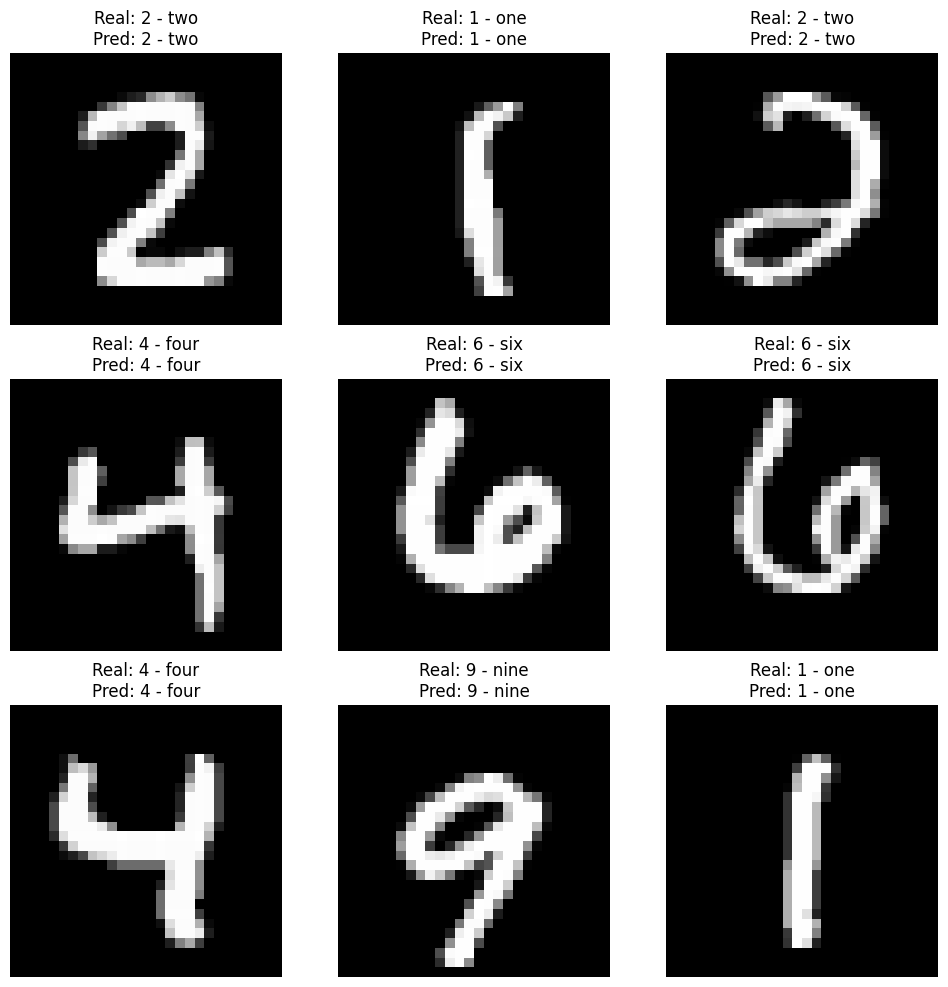

In [75]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
random.seed(42)

rows = 3
cols = 3

model_0_ex.eval()
with torch.inference_mode():
  plt.figure(figsize=(rows*4, cols*4))
  for i in range(rows*cols):
    image, label = test_data[random.randint(0, len(test_data))]

    image = image.unsqueeze(0).to(device)
    logits = model_0_ex(image)
    pred_probs = torch.softmax(logits.squeeze(), 0)
    pred = pred_probs.argmax(dim=0)

    plt.subplot(3, 3, i+1)
    plt.title(f"Real: {class_names[label]}\nPred: {class_names[pred.cpu()]}")
    plt.axis(False)
    plt.imshow(image.squeeze().cpu(), cmap="gray")

11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [76]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split("."))[1] >= 19, "mlxtend version should be 0.10.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1
mlxtend version: 0.23.1


In [77]:
model_0_ex.eval()
with torch.inference_mode():
  preds = []
  for i in tqdm(range(len(test_data))):
    image, label = test_data[i]

    image = image.unsqueeze(0).to(device)
    logits = model_0_ex(image)
    pred_probs = torch.softmax(logits.squeeze(), 0)
    pred = pred_probs.argmax(dim=0)

    preds.append(pred.unsqueeze(0).cpu())

preds_tensor = torch.cat(preds)
preds_tensor.shape

  0%|          | 0/10000 [00:00<?, ?it/s]

torch.Size([10000])

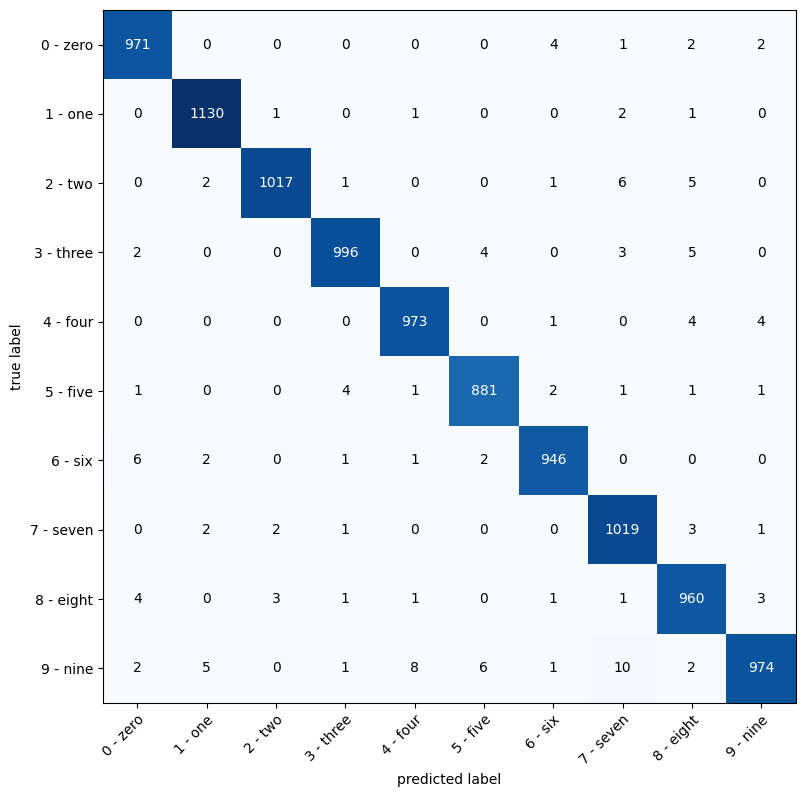

In [78]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))

confmat_tensor = confmat(preds_tensor, test_data.targets)

plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    figsize=(9, 9),
    class_names=class_names
);

12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [79]:
random_tensor = torch.randn(1, 3, 64, 64)
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [80]:
test_conv_layer_2x2 = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=(2, 2)
)
test_conv_layer_3x3 = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=(3, 3)
)
test_conv_layer_4x4 = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=(4, 4)
)

test_conv_layer_2x2, test_conv_layer_3x3, test_conv_layer_4x4

(Conv2d(3, 10, kernel_size=(2, 2), stride=(1, 1)),
 Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1)),
 Conv2d(3, 10, kernel_size=(4, 4), stride=(1, 1)))

In [81]:
result_conv_2x2 = test_conv_layer_2x2(random_tensor)
result_conv_3x3 = test_conv_layer_3x3(random_tensor)
result_conv_4x4 = test_conv_layer_4x4(random_tensor)

print(f"Result of 2x2 kernel_size: {result_conv_2x2.shape}")
print(f"Result of 3x3 kernel_size: {result_conv_3x3.shape}")
print(f"Result of 4x4 kernel_size: {result_conv_4x4.shape}")

Result of 2x2 kernel_size: torch.Size([1, 10, 63, 63])
Result of 3x3 kernel_size: torch.Size([1, 10, 62, 62])
Result of 4x4 kernel_size: torch.Size([1, 10, 61, 61])


13. Use a model similar to the trained `model_2` from this notebook to make predictions on the test `torchvision.datasets.FashionMNIST` dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [82]:
train_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [83]:
image, label = train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [84]:
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

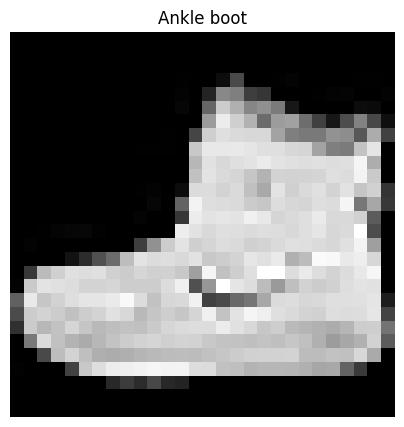

In [85]:
plt.figure(figsize=(5, 5))
plt.title(class_names[label])
plt.axis(False)
plt.imshow(image.squeeze(), cmap="gray");

In [86]:
class FashionMNISTModelV3(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_layers: int,
               output_shape: int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_layers,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_layers,
                  out_channels=hidden_layers,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2, 2))
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_layers,
                  out_channels=hidden_layers,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_layers,
                  out_channels=hidden_layers,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_layers*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [87]:
model_1_ex = FashionMNISTModelV3(
    input_shape=1,
    hidden_layers=10,
    output_shape=len(class_names)
)

model_1_ex

FashionMNISTModelV3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [88]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_1_ex.parameters(), lr=0.1)

In [89]:
epochs = 3

train_time_start_model_1_ex_gpu = timer()

for epoch in tqdm(range(epochs)):
  print(f"\nEpoch {epoch}\n------------")

  train_step(
      model=model_1_ex,
      data_loader=train_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      device=device
  )

  test_step(
      model=model_1_ex,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device
  )

train_time_end_model_1_ex_gpu = timer()

total_train_time_model_1_ex_gpu = print_train_time(start=train_time_start_model_1_ex_gpu,
                                                   end=train_time_end_model_1_ex_gpu,
                                                   device=device)

  0%|          | 0/3 [00:00<?, ?it/s]


Epoch 0
------------
Train loss: 0.60994 | Train acc: 77.61%
Test loss: 0.38619 | Test acc: 86.04%

Epoch 1
------------
Train loss: 0.35329 | Train acc: 87.30%
Test loss: 0.36392 | Test acc: 87.25%

Epoch 2
------------
Train loss: 0.31732 | Train acc: 88.48%
Test loss: 0.32486 | Test acc: 87.94%

Train time on cuda: 54.379 seconds


In [90]:
# Make predictions and store the mistakes
model_images = []
model_predictions = []
true_labels = []

model_1_ex.eval()
with torch.inference_mode():
  for i in tqdm(range(len(test_data))):
    image, label = train_data[i]
    y_logits = model_1_ex(image.unsqueeze(0).to(device))
    y_probs = torch.softmax(y_logits.squeeze(), dim=0)
    y_pred = y_probs.argmax(dim=0)

    if y_pred != label:
      model_images.append(image.cpu())
      model_predictions.append(y_pred.cpu())
      true_labels.append(label)

  0%|          | 0/10000 [00:00<?, ?it/s]

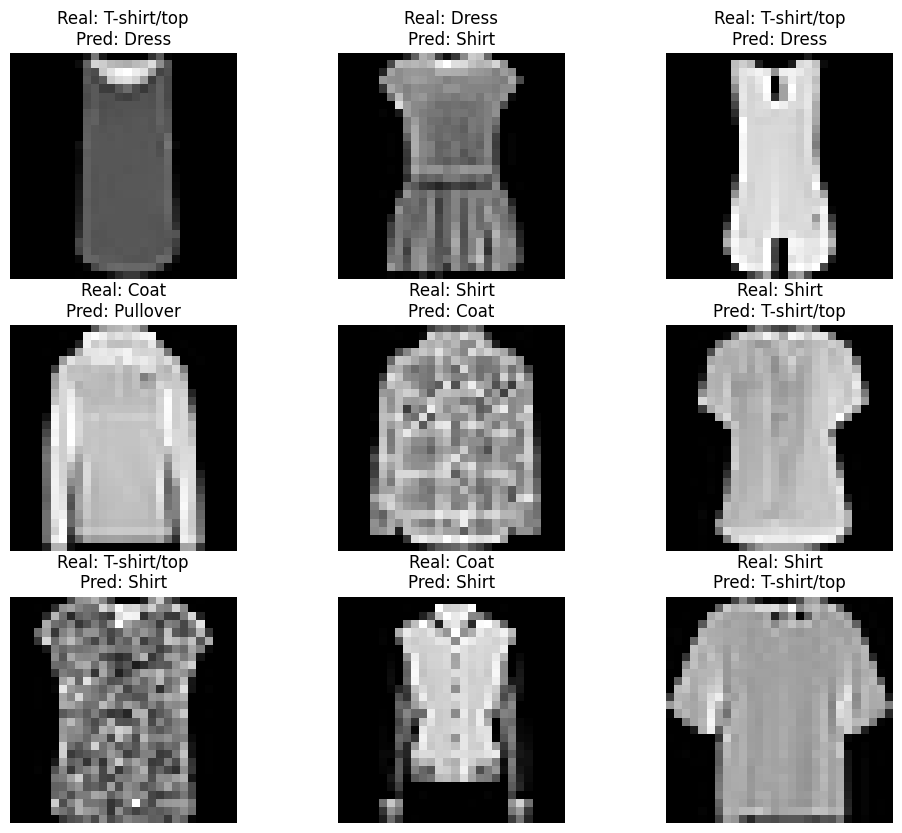

In [91]:
# Plot some mistakes
itr = 9 if len(model_predictions) >= 9 else len(model_predictions)

plt.figure(figsize=(12, 10))
for i in range(itr):
  plt.subplot(3, 3, i+1)
  plt.axis(False)
  plt.title(f"Real: {class_names[true_labels[i]]}\nPred: {class_names[model_predictions[i]]}")
  plt.imshow(model_images[i].squeeze(), cmap="gray")

> **Answer:** I think that the data labels are too close in definition in some cases. Confusing *T-Shirt* and *Shirt* its pretty normal I guess. With the data staying as it is, I don't think the model could be improved very much, at least not with my actual knowledge. Maybe adding some more layers or tweaking some hyperparameters we could get a better result with a better accuracy measure.